In [ ]:
%run task2a.ipynb
%run task2.ipynb
import numpy as np
import utils
#from task2a import one_hot_encode, pre_process_images, SoftmaxModel, gradient_approximation_test

Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
Standard deviation: 49.37799682313607
Mean value: 33.55274553571429
Standard deviation: 49.06676795408154
Mean value: 33.791224489795916
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 64)
Initializing weight to shape: (64, 10)
Final Train Cross Entropy Loss: 0.19402827123624056
Final Validation Cross Entropy Loss: 0.28549055931437756
Train accuracy: 0.94315
Validation accuracy: 0.9247


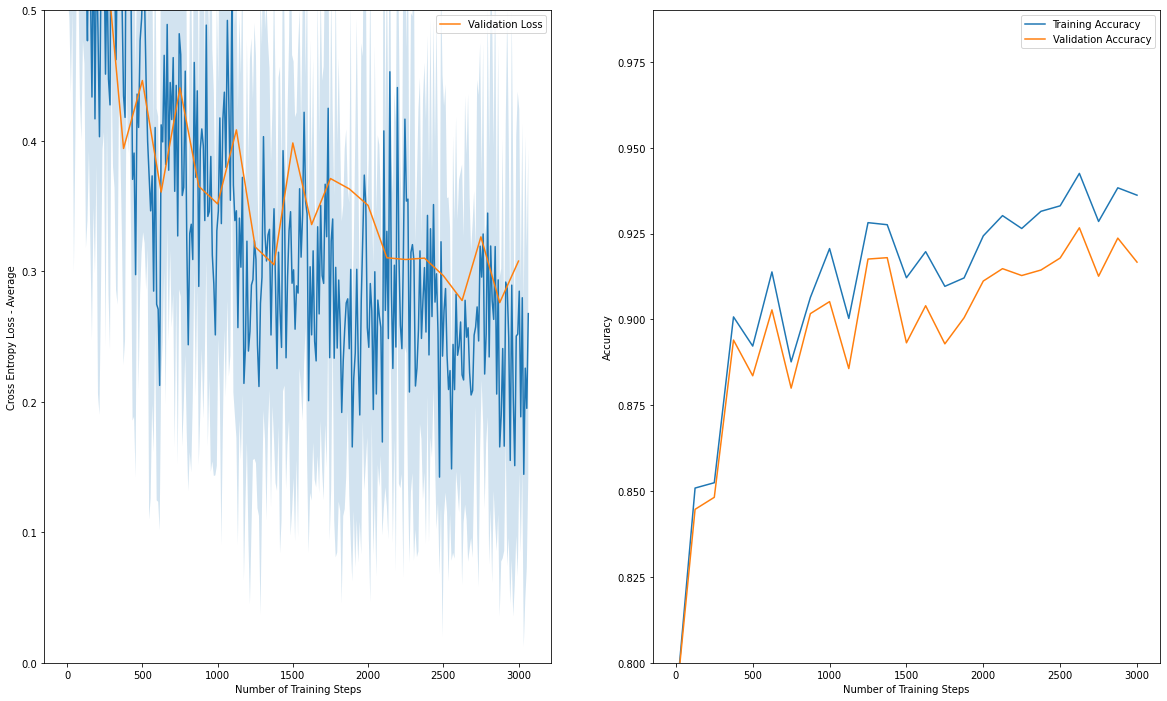

In [ ]:
if __name__ == "__main__":
    # hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
    num_epochs = 5
    #learning_rate = .1  #For task 2
    learning_rate = .02 #For task 3 and 4
    batch_size = 32
    #neurons_per_layer = [128, 10]
    neurons_per_layer = [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 10]
    momentum_gamma = .9  # Task 3 hyperparameter
    shuffle_data = True

    # Settings for task 3. Keep all to false for task 2.
    use_improved_sigmoid = True
    use_improved_weight_init = True
    use_momentum = True

    # Load dataset
    X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
    X_train = pre_process_images(X_train)
    X_val = pre_process_images(X_val)
    Y_train = one_hot_encode(Y_train, 10)
    Y_val = one_hot_encode(Y_val, 10)
    # Hyperparameters

    model = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)

    print("Final Train Cross Entropy Loss:",
          cross_entropy_loss(Y_train, model.forward(X_train)))
    print("Final Validation Cross Entropy Loss:",
          cross_entropy_loss(Y_val, model.forward(X_val)))
    print("Train accuracy:", calculate_accuracy(X_train, Y_train, model))
    print("Validation accuracy:", calculate_accuracy(X_val, Y_val, model))

    # Plot loss for first model (task 2c)
    plt.figure(figsize=(20, 12))
    plt.subplot(1, 2, 1)
    plt.ylim([0., .5])
    utils.plot_loss(train_history["loss"],
                    "Training Loss", npoints_to_average=10)
    utils.plot_loss(val_history["loss"], "Validation Loss")
    plt.legend()
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Cross Entropy Loss - Average")
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.ylim([0.80, .99])
    utils.plot_loss(train_history["accuracy"], "Training Accuracy")
    utils.plot_loss(val_history["accuracy"], "Validation Accuracy")
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Accuracy")
    plt.legend()
    #plt.savefig("task2c_train_loss.png")
    #plt.savefig("task4d.png")

In [ ]:
'''
# Gradient approximation check for 100 images
X_train = X_train[:100]
Y_train = Y_train[:100]
for layer_idx, w in enumerate(model.ws):
    model.ws[layer_idx] = np.random.uniform(-1, 1, size=w.shape)

gradient_approximation_test(model, X_train, Y_train)
'''

'\n# Gradient approximation check for 100 images\nX_train = X_train[:100]\nY_train = Y_train[:100]\nfor layer_idx, w in enumerate(model.ws):\n    model.ws[layer_idx] = np.random.uniform(-1, 1, size=w.shape)\n\ngradient_approximation_test(model, X_train, Y_train)\n'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc7fa119-6ed4-4d50-aa34-54bc46270896' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>